In [228]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [229]:
con = sqlite3.connect('../data/checking-logs.sqlite')

---
### Tables we have

In [230]:
pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', con)

,name
0,pageviews
1,checker
2,deadlines


### Table `checker` contains:

In [231]:
pd.read_sql('SELECT * FROM checker LIMIT 3', con)

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1


### Creating dataframe with `hour` of the commit and boolean `weekend` (`true` for weekends)

In [232]:
df = pd.read_sql("SELECT timestamp FROM checker WHERE uid LIKE 'user_%'", con, parse_dates=['timestamp'])
df['hour'] = df.timestamp.dt.hour
df['weekday'] = df.timestamp.dt.dayofweek.apply(lambda x: 'weekend' if x > 4 else 'working day')
df

,timestamp,hour,weekday
0,2020-04-17 05:19:02.744528,5,working day
1,2020-04-17 05:22:35.249331,5,working day
2,2020-04-17 05:22:45.549397,5,working day
3,2020-04-17 05:34:14.691200,5,working day
4,2020-04-17 05:34:24.422370,5,working day
...,...,...,...
3202,2020-05-21 20:19:06.872761,20,working day
3203,2020-05-21 20:22:41.785725,20,working day
3204,2020-05-21 20:22:41.877806,20,working day
3205,2020-05-21 20:37:00.129678,20,working day


### Creating two lists with data separated workdays and weekdays

In [233]:
data = [df[df.weekday=='weekend'],
        df[~(df.weekday=='weekend')]]
print(len(data[0]))
print(len(data[1]))
data[1]

1170
2037


,timestamp,hour,weekday
0,2020-04-17 05:19:02.744528,5,working day
1,2020-04-17 05:22:35.249331,5,working day
2,2020-04-17 05:22:45.549397,5,working day
3,2020-04-17 05:34:14.691200,5,working day
4,2020-04-17 05:34:24.422370,5,working day
...,...,...,...
3202,2020-05-21 20:19:06.872761,20,working day
3203,2020-05-21 20:22:41.785725,20,working day
3204,2020-05-21 20:22:41.877806,20,working day
3205,2020-05-21 20:37:00.129678,20,working day


---
## Drawing a plot

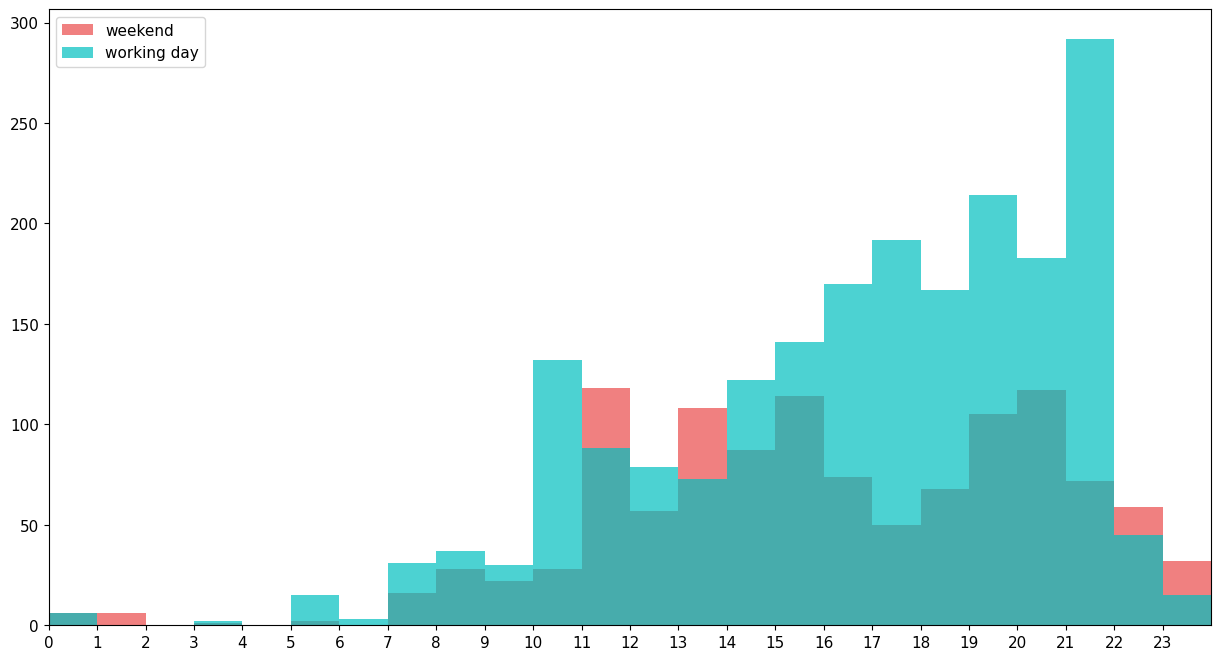

In [234]:
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(figsize=(15, 8))
n1, bins1, patches1 = plt.hist(data[0]['hour'], bins=24, range=(0, 24), color='lightcoral')
n2, bins2, patches2 = plt.hist(data[1]['hour'], bins=24, range=(0, 24), color='c', alpha=0.7)
plt.legend(['weekend', 'working day'], loc='upper left')
ax.set_xticks(range(0, 24)) # so we can clearly see the hours 
ax.set_xlim(left=0, right=24)

plt.show()

In [235]:
con.close()

---
## Question

Are there hours when the total number of commits was higher on weekends than on working days?
> In your answer, put the top-4 examples.

---
## Answer

Yes, 11, 13, 22, 23